# **🌺The Iris Flower Problem**
The problem is to predict the specie of a new flower measurement.

In [30]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import warnings


parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
from _custom_func import load_data, extract_data
from iris_module import species_map

sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)
sklearn.set_config(display="diagram")


warnings.filterwarnings("ignore")

extract_data("../datasets/IRIS.zip")

print("\n💯 😊 \033[034mSetup successfully loaded to memory.\033[om 💹")


💯 😊 Setup successfully loaded to memory.m 💹


## **Load the data**

In [2]:
df = load_data("./data/IRIS.csv")
df.head()


Data loaded successfully . . .


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df["target"] = df.species.map(species_map)

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


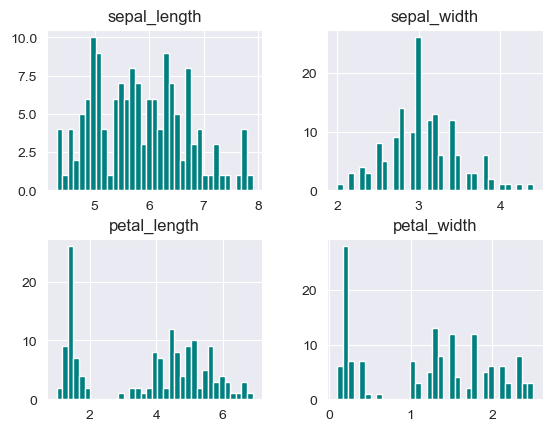

In [5]:
(ax0, ax1) = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].hist(bins=35, color="teal")

From the plots and tables above, some correlations between lengths and widths are revealed. A scatter plot will show this better. To plot a scatter plot, the `species` column needs to be mapped into an integer.

<Axes: title={'center': 'Scatter plot of Sepal length and Sepal width'}, xlabel='petal_length', ylabel='petal_width'>

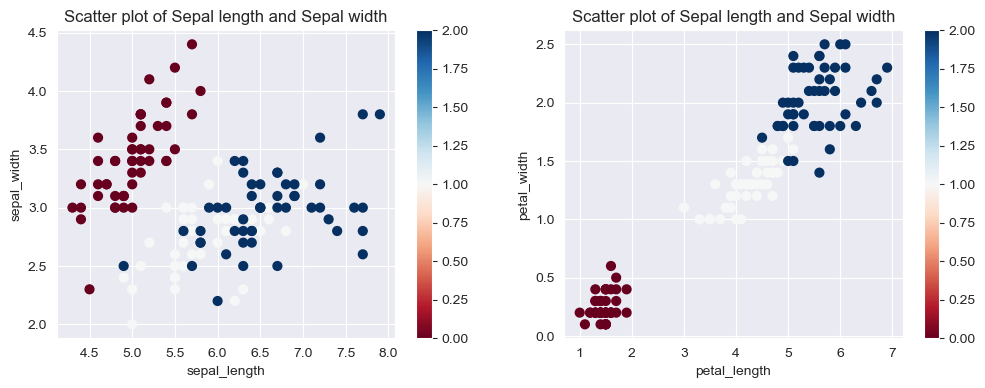

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df.plot(ax=ax1, title="Scatter plot of Sepal length and Sepal width",
        kind="scatter",x="sepal_length", y="sepal_width", c=df["target"], cmap="RdBu", s=40)

df.plot(ax=ax2, title="Scatter plot of Sepal length and Sepal width",
        kind="scatter",x="petal_length", y="petal_width", c=df["target"], cmap="RdBu", s=40)

From the two charts, there is a positive correlation between the `Sepal length` and `Sepal width` for a given type of specie. The same also goes for `Petal length` and `Petal width`. Also, there are clear boundries between the species as seen from the graphs, hence, a good classifier will predict the specie of an unknown class with a high accuracy.

### **Prepare data for machine learning**

The data contains o missinng features, but future measurements may contain missing data. Also, all features are floating point numbers and can be scaled using Standard Scaler.

In [7]:
y = df["target"]
X = df.drop(["species", "target"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

preprocessing = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scale", StandardScaler())
])

## **Select and train a model**
- **K Nearest Neighboor**: For  this, a model is trained for each value of $n$ from $n = 3$ to $n = 30$. The best value of $n$ that gives the best training and validation acuracy is chosen.

- **Support Vector Machine**

### **`KNearestNeighbor`**

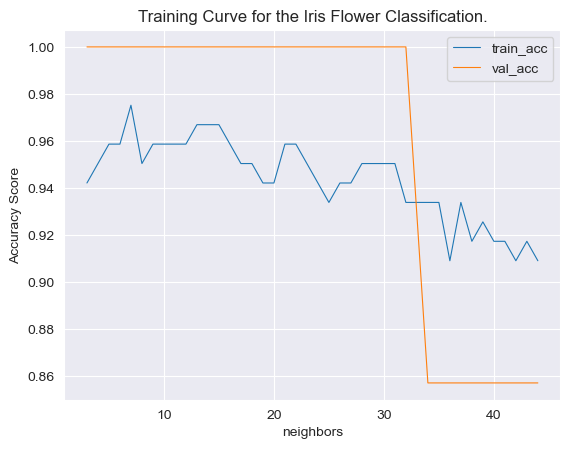

In [23]:
training = {
    "neighbors": np.arange(3, 45),
    "train_acc": [],
    "val_acc": []
}

for neighbor in training["neighbors"]:
    knn = make_pipeline(
        preprocessing, KNeighborsClassifier(n_neighbors=neighbor))
    knn.fit(X_train, y_train)
    training["train_acc"].append(knn.score(X_train, y_train))
    training["val_acc"].append(knn.score(X_val, y_val))
    
training_df = pd.DataFrame(training).set_index("neighbors")

fig, ax = plt.subplots()
ax = training_df.plot(linewidth=0.8, ax=ax, title="Training Curve for the Iris Flower Classification.", ylabel="Accuracy Score")

From the given `knn`, it is seen that the model do not perform very well for the training and the validating score. Selecting a beter model.

### **`SupportVectorClassifier`**

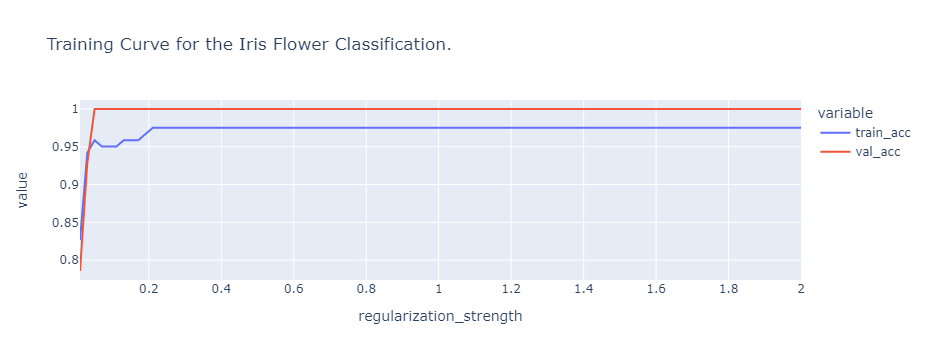

In [40]:
training = {
    "regularization_strength": np.linspace(0.01, 2, 100),
    "train_acc": [],
    "val_acc": []
}

for c in training["regularization_strength"]:
    svm_model = make_pipeline(
        preprocessing, SVC(C=c, kernel="linear"))
    svm_model.fit(X_train, y_train)
    training["train_acc"].append(svm_model.score(X_train, y_train))
    training["val_acc"].append(svm_model.score(X_val, y_val))
    
training_df = pd.DataFrame(training).set_index("regularization_strength")

fig = px.line(data_frame=training_df, title="Training Curve for the Iris Flower Classification.")
fig.show()
# ax = training_df.plot(linewidth=0.8, ax=ax, title="Training Curve for the Iris Flower Classification.", ylabel="Accuracy Score")

In [48]:
final_model = make_pipeline(
        preprocessing, SVC(C=0.0501, kernel="linear"))
final_model.fit(X_train, y_train)
print(f"Training Accuracy: {accuracy_score(y_train, final_model.predict(X_train)).round(4) * 100}%")
print(f" Testing Accuracy: {accuracy_score(y_test, final_model.predict(X_test)).round(4) * 100}%")

Training Accuracy: 95.87%
 Testing Accuracy: 100.0%
